In [53]:
# Imports
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando os dados
dsa_dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Multivariada/WorldSustainabilityDataset.csv")

In [3]:
# Shape
dsa_dados.shape

(3287, 54)

In [4]:
# Amostra dos dados
dsa_dados.sample(10)

,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
604,China,CHN,2015,100.000000,7.410645,25.480743,3.200697,0.708557,0.000000,0.462228,...,38.6,Upper-middle income,50.300000,75.928,1.371220e+09,Closed Autocracy,44.500,1.182764,55.500,Eastern and South-Eastern Asia
1449,Iraq,IRQ,2005,NaN,-9.133116,13.570465,5.806219,11.327683,0.000000,0.690459,...,NaN,Lower-middle income,0.900000,68.266,2.692228e+07,Electoral Autocracy,31.234,66.690018,68.766,Northern Africa and Western Asia
575,Chile,CHL,2005,97.893509,8.036375,7.254119,1.278729,6.133348,0.000000,0.151711,...,NaN,Upper-middle income,31.175347,77.630,1.618271e+07,Liberal Democracy,13.217,9.746467,86.783,Latin America and Caribbean
2920,Thailand,THA,2013,99.427063,NaN,11.080793,2.358741,2.584610,0.391870,0.400879,...,37.8,Upper-middle income,28.940000,75.378,6.814452e+07,Electoral Autocracy,53.807,2.733495,46.193,Eastern and South-Eastern Asia
1368,Indonesia,IDN,2000,86.300000,175.094481,13.605523,3.174163,7.519280,0.000000,0.995095,...,28.6,Low income,NaN,NaN,NaN,Electoral Democracy,57.998,NaN,NaN,Eastern and South-Eastern Asia
2365,Pakistan,PAK,2009,70.753090,2.132091,6.469023,2.677240,1.305307,0.175200,2.617670,...,NaN,Lower-middle income,7.500000,64.969,1.755256e+08,Electoral Autocracy,65.207,1.711927,34.793,Central and Southern Asia
1866,"Macao SAR, China",MAC,2004,100.000000,NaN,NaN,0.376729,NaN,NaN,NaN,...,NaN,High income,31.484097,81.304,4.716000e+05,NaN,0.000,0.001426,100.000,Eastern and South-Eastern Asia
1179,Guinea-Bissau,GNB,2001,NaN,7.151486,-3.095650,0.772477,0.000000,0.000000,4.426538,...,NaN,Low income,0.299569,50.744,1.227105e+06,Electoral Autocracy,63.378,11.027015,36.622,Sub-Saharan Africa
2067,Montenegro,MNE,2015,100.000000,5.123379,NaN,1.880707,0.121070,0.000000,0.301655,...,39.0,Upper-middle income,68.119786,76.452,6.221590e+05,Electoral Autocracy,34.194,0.721399,65.806,Europe and Northern America
1946,Maldives,MDV,2008,93.596642,NaN,NaN,1.134974,0.005891,0.005891,0.206838,...,NaN,Lower-middle income,23.200000,75.073,3.434480e+05,Electoral Autocracy,64.390,0.005555,35.610,Central and Southern Asia


In [5]:
# Colunas
dsa_dados.columns

Index(['Country Name', 'Country Code', 'Year',
       'Access to electricity (% of population) - EG.ELC.ACCS.ZS',
       'Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG',
       'Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS',
       'Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS',
       'Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS',
       'Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS',
       'Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS',
       'Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5',
       'Broad money (% of GDP) - FM.LBL.BMNY.GD.ZS',
       'Children out of school (% of primary school age) - SE.PRM.UNER.ZS',
       'Compulsory education, duration (years) - SE.COM.DURS',
       'Cost of business start-up procedures, female (% of GNI per capita) - IC.REG.CO

In [6]:
# Tipos de dados
dsa_dados.dtypes

,0
Country Name,object
Country Code,object
Year,int64
Access to electricity (% of population) - EG.ELC.ACCS.ZS,float64
Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,float64
"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",float64
Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,float64
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,float64
Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,float64
Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,float64


<Axes: >

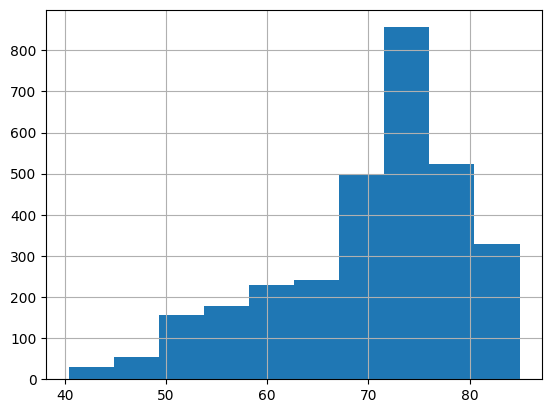

In [7]:
dsa_dados['Life expectancy at birth, total (years) - SP.DYN.LE00.IN'].hist()

In [8]:
# Resumo estatístico (variáveis numéricas)
dsa_dados.describe()

,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,"Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5",Broad money (% of GDP) - FM.LBL.BMNY.GD.ZS,...,"Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2","Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2","Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Gini index (World Bank estimate) - SI.POV.GINI,Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS
count,3287.000000,3193.000000,2566.000000,2628.000000,3220.000000,3094.000000,3111.000000,3099.000000,2285.000000,2777.000000,...,1807.000000,1806.000000,3285.000000,1303.000000,2986.000000,3096.000000,3.106000e+03,3278.000000,3053.000000,3106.000000
mean,2009.000000,79.300662,2.499857,8.870028,1.742674,3.812051,0.692833,0.880541,45.391741,57.034297,...,7.987327,9.810687,174.646907,37.512203,33.117667,70.160098,3.891506e+07,42.890186,7.015880,57.264100
std,5.478059,30.398748,18.752649,12.277347,1.957442,6.958003,2.657800,1.084312,45.915444,43.806176,...,5.781539,7.159265,757.653194,8.595502,29.386654,9.205632,1.413757e+08,22.705962,10.730922,22.687638
min,2000.000000,1.270180,-645.655290,-97.524776,0.090292,0.000000,0.000000,0.009500,0.000000,2.857408,...,0.100000,0.200000,0.048000,23.700000,0.000000,40.369000,6.967100e+04,0.000000,0.000000,8.461000
25%,2004.000000,62.900000,-0.246761,3.339159,0.741310,0.078542,0.000000,0.149597,9.558670,27.222821,...,4.100000,4.725000,2.426000,30.900000,6.000000,65.109000,2.406866e+06,24.816500,0.385851,39.546750
50%,2009.000000,98.653969,2.545392,8.752619,1.145867,0.878741,0.000000,0.388686,34.951665,47.054379,...,6.400000,7.500000,12.621000,35.600000,25.000000,72.564634,8.368371e+06,42.648000,2.122046,57.450000
75%,2014.000000,100.000000,5.545831,15.290790,2.056927,4.656705,0.097040,1.286091,62.252217,72.465711,...,10.000000,12.800000,72.012000,42.800000,58.000000,76.572750,2.605396e+07,60.732750,8.878282,75.372500
max,2018.000000,100.000000,229.493078,45.354086,27.101473,71.290764,40.772569,6.542877,324.172288,396.185604,...,37.000000,42.800000,9956.569000,64.800000,99.652849,84.934146,1.392730e+09,91.754000,81.949962,100.000000


In [9]:
# Função para o plot da relação da variável alvo com alguns atributos
def dsa_get_pairs(data, alvo, atributos, n):

    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [10]:
# Variável alvo
alvo = ['Life expectancy at birth, total (years) - SP.DYN.LE00.IN']

In [11]:
# Vamos usar alguns atributos
atributos = ['School enrollment, secondary (% gross) - SE.SEC.ENRR', 'Rural population (% of total population) - SP.RUR.TOTL.ZS', 'Individuals using the Internet (% of population) - IT.NET.USER.ZS', 'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes', 'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1']

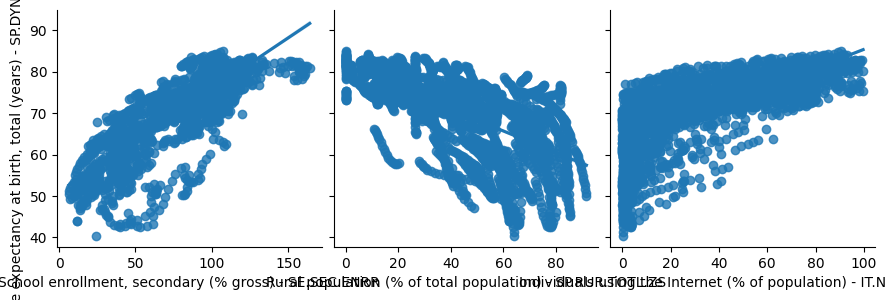

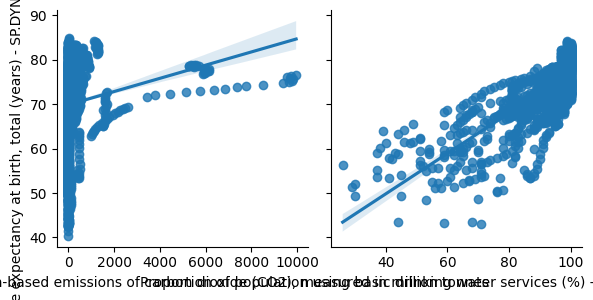

In [12]:
# Verificando outliers
dsa_get_pairs(dsa_dados, alvo, atributos, 3)

In [13]:
# Visualizando o total de linhas por coluna
dsa_dados.count()

,0
Country Name,3287
Country Code,3287
Year,3287
Access to electricity (% of population) - EG.ELC.ACCS.ZS,3193
Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,2566
"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",2628
Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,3220
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,3094
Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,3111
Adjusted savings: particulate emission damage (% of GNI) - NY.ADJ.DPEM.GN.ZS,3099


In [14]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = dsa_dados.isnull().sum().sort_values(ascending = False)

In [15]:
print(valores_ausentes)

Gini index (World Bank estimate) - SI.POV.GINI                                                  1984
Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1             1983
Proportion of population covered by at least a 3G mobile network (%) - IT_MOB_3GNTWK - 9.c.1    1930
Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2                                               1481
Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2                                                1480
Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1                                        1453
Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1       1450
Children out of school (% of primary school age) - SE.PRM.UNER.ZS                               1062
Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS                       1061
Automated teller machines (ATMs) (per 100,000 adults) - FB.ATM.TOTL.P5                     

In [16]:
# Calculando o percentual de valores ausentes
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / dsa_dados.shape[0]

In [17]:
print(f'{valores_ausentes_percent * 100} %')

Gini index (World Bank estimate) - SI.POV.GINI                                                  60.358990
Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1             60.328567
Proportion of population covered by at least a 3G mobile network (%) - IT_MOB_3GNTWK - 9.c.1    58.716155
Unemployment rate, women (%) - SL_TLF_UEM - 8.5.2                                               45.056282
Unemployment rate, male (%) - SL_TLF_UEM - 8.5.2                                                45.025859
Prevalence of undernourishment (%) - SN_ITK_DEFC - 2.1.1                                        44.204442
Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1       44.113173
Children out of school (% of primary school age) - SE.PRM.UNER.ZS                               32.309096
Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS                       32.278674
Automated teller machines (ATMs) (per 100,000 

In [18]:
# Criar DataFrame com total e percentual de ausentes
valores_ausentes_df = pd.DataFrame({
    'Total Ausentes': valores_ausentes,
    '% Ausentes': (valores_ausentes / dsa_dados.shape[0]) * 100
})

# Selecionar apenas as colunas com menos de 10% de valores ausentes
colunas_validas = valores_ausentes_df[valores_ausentes_df['% Ausentes'] < 10].index

# Criar novo dataset apenas com essas colunas
dsa_dados_filtrado = dsa_dados[colunas_validas]

In [19]:
dsa_dados_filtrado.head()

,"Compulsory education, duration (years) - SE.COM.DURS",Individuals using the Internet (% of population) - IT.NET.USER.ZS,General government final consumption expenditure (% of GDP) - NE.CON.GOVT.ZS,Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS,Gross national expenditure (% of GDP) - NE.DAB.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,Regime Type (RoW Measure Definition),"Inflation, consumer prices (annual %) - FP.CPI.TOTL.ZG",Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,...,GDP (current US$) - NY.GDP.MKTP.CD,Rural population (% of total population) - SP.RUR.TOTL.ZS,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Continent,World Regions (UN SDG Definition),Income Classification (World Bank Definition),Country Code,Country Name,Year,Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS
0,NaN,NaN,21.410594,70.792132,96.288035,NaN,NaN,NaN,4.044021,0.000190,...,1.873453e+09,53.283,2.378,North America,Latin America and Caribbean,High income,ABW,Aruba,2000,0.1753
1,NaN,17.1,24.527204,74.338086,98.050626,0.000712,NaN,NaN,2.883604,0.000214,...,1.920112e+09,53.661,2.407,North America,Latin America and Caribbean,High income,ABW,Aruba,2001,0.1805
2,NaN,18.8,25.151079,77.553957,104.460432,0.000657,NaN,NaN,3.315247,0.000223,...,1.941341e+09,54.028,2.437,North America,Latin America and Caribbean,High income,ABW,Aruba,2002,0.1814
3,NaN,20.8,24.709784,78.551686,107.766722,0.000700,NaN,NaN,3.656365,0.000243,...,2.021229e+09,54.394,2.561,North America,Latin America and Caribbean,High income,ABW,Aruba,2003,0.1846
4,NaN,23.0,23.163700,74.705440,103.484583,0.000685,NaN,NaN,2.529129,0.000256,...,2.228492e+09,54.760,2.616,North America,Latin America and Caribbean,High income,ABW,Aruba,2004,0.1871


In [20]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes_2 = dsa_dados_filtrado.isnull().sum().sort_values(ascending = False)

In [21]:
print(valores_ausentes_2)

Compulsory education, duration (years) - SE.COM.DURS                                     308
Individuals using the Internet (% of population) - IT.NET.USER.ZS                        301
General government final consumption expenditure (% of GDP) - NE.CON.GOVT.ZS             256
Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS                                240
Gross national expenditure (% of GDP) - NE.DAB.TOTL.ZS                                   240
Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS                             234
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS           225
Regime Type (RoW Measure Definition)                                                     211
Inflation, consumer prices (annual %) - FP.CPI.TOTL.ZG                                   204
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS             193
Life expectancy at birth, total (years) - SP.DYN.LE00.IN              

In [23]:
# Remove as colunas objeto
dsa_dados_1 = dsa_dados_filtrado.drop(["Country Name","Country Code", "Year", "Continent", "Income Classification (World Bank Definition)", "Regime Type (RoW Measure Definition)", "World Regions (UN SDG Definition)"], axis=1)

In [24]:
dsa_dados_1.head()

,"Compulsory education, duration (years) - SE.COM.DURS",Individuals using the Internet (% of population) - IT.NET.USER.ZS,General government final consumption expenditure (% of GDP) - NE.CON.GOVT.ZS,Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS,Gross national expenditure (% of GDP) - NE.DAB.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,"Inflation, consumer prices (annual %) - FP.CPI.TOTL.ZG",Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN",...,Imports of goods and services (% of GDP) - NE.IMP.GNFS.ZS,Trade (% of GDP) - NE.TRD.GNFS.ZS,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Women Business and the Law Index Score (scale 1-100) - SG.LAW.INDX,Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,GDP per capita (current US$) - NY.GDP.PCAP.CD,GDP (current US$) - NY.GDP.MKTP.CD,Rural population (% of total population) - SP.RUR.TOTL.ZS,"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Renewable energy consumption (% of total final energy consumption) - EG.FEC.RNEW.ZS
0,NaN,NaN,21.410594,70.792132,96.288035,NaN,NaN,4.044021,0.000190,NaN,...,70.672853,145.073178,91.660398,NaN,2.389134,20617.75047,1.873453e+09,53.283,2.378,0.1753
1,NaN,17.1,24.527204,74.338086,98.050626,0.000712,NaN,2.883604,0.000214,73.853,...,68.548152,139.045679,100.000000,NaN,2.509046,20670.36701,1.920112e+09,53.661,2.407,0.1805
2,NaN,18.8,25.151079,77.553957,104.460432,0.000657,NaN,3.315247,0.000223,73.937,...,69.381295,134.302158,100.000000,NaN,2.721385,20436.88713,1.941341e+09,54.028,2.437,0.1814
3,NaN,20.8,24.709784,78.551686,107.766722,0.000700,NaN,3.656365,0.000243,74.038,...,70.867883,133.969044,100.000000,NaN,2.733676,20833.97636,2.021229e+09,54.394,2.561,0.1846
4,NaN,23.0,23.163700,74.705440,103.484583,0.000685,NaN,2.529129,0.000256,74.156,...,68.563550,133.642517,100.000000,NaN,2.678363,22568.37499,2.228492e+09,54.760,2.616,0.1871


In [25]:
dsa_dados_1 = dsa_dados_1.dropna()

In [26]:
# Extraindo o total de valores ausentes por coluna
dsa_dados_1.isnull().sum().sort_values(ascending = False)

,0
"Compulsory education, duration (years) - SE.COM.DURS",0
Individuals using the Internet (% of population) - IT.NET.USER.ZS,0
General government final consumption expenditure (% of GDP) - NE.CON.GOVT.ZS,0
Final consumption expenditure (% of GDP) - NE.CON.TOTL.ZS,0
Gross national expenditure (% of GDP) - NE.DAB.TOTL.ZS,0
Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,0
Proportion of seats held by women in national parliaments (%) - SG.GEN.PARL.ZS,0
"Inflation, consumer prices (annual %) - FP.CPI.TOTL.ZG",0
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,0
"Life expectancy at birth, total (years) - SP.DYN.LE00.IN",0


In [27]:
# Função para filtrar e visualizar correlação
def dsa_filtrar_e_visualizar_correlacao(dsa_dados_1, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = dsa_dados_1.corr()

    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')

    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column,
                                       errors = 'ignore').drop(columns = drop_column,
                                                               errors = 'ignore')

    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

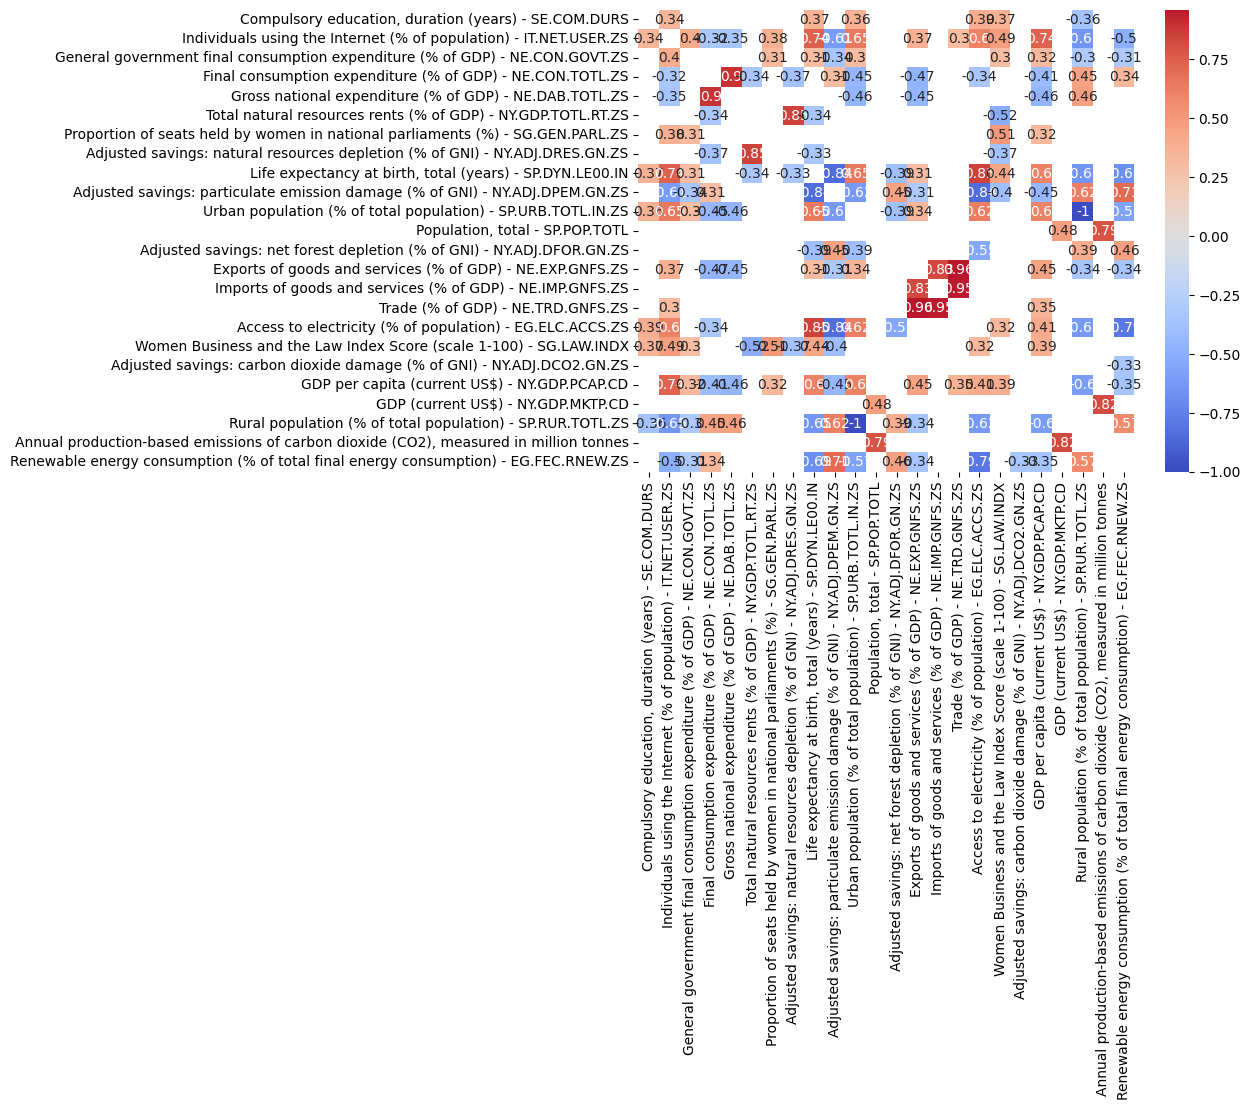

In [28]:
# Executa a função
dsa_filtrar_e_visualizar_correlacao(dsa_dados_1, threshold = 0.3, drop_column = None)

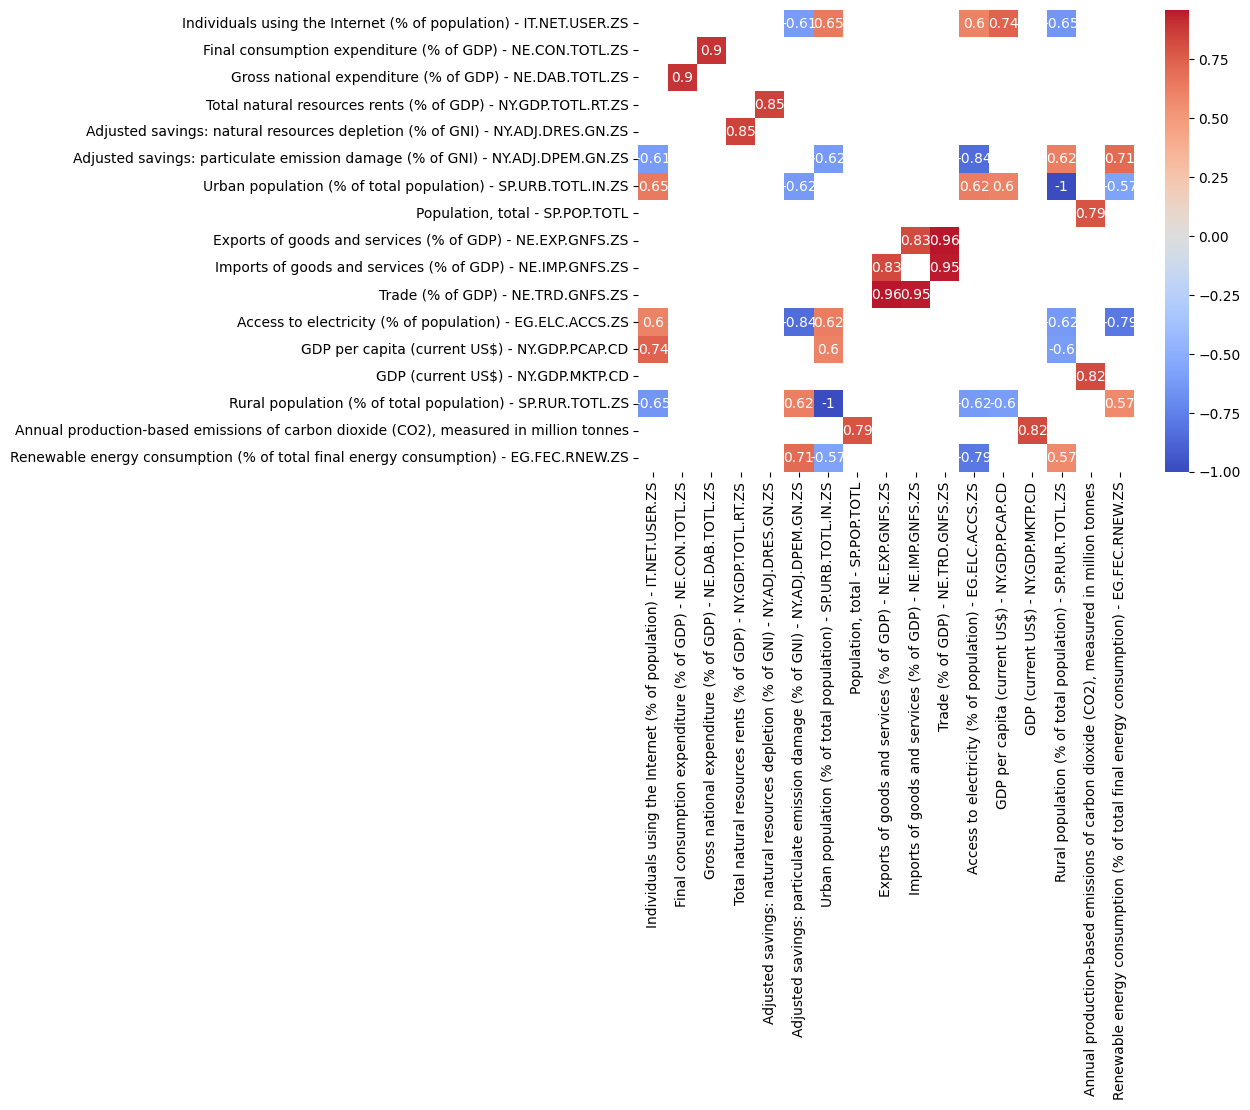

In [29]:
# Executa a função
dsa_filtrar_e_visualizar_correlacao(dsa_dados_1, threshold = 0.55, drop_column = 'Life expectancy at birth, total (years) - SP.DYN.LE00.IN')

In [30]:
# Separando variáveis independentes (X) e dependente (y)
X = dsa_dados_1.drop('Life expectancy at birth, total (years) - SP.DYN.LE00.IN', axis = 1)
y = dsa_dados_1['Life expectancy at birth, total (years) - SP.DYN.LE00.IN']

In [31]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
# Inicializando e treinando o RandomForestRegressor
modelo = RandomForestRegressor(n_estimators = 100, random_state = 42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Fazendo previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

In [34]:
# Avaliando o modelo
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [35]:
print(f"RMSE: {rmse}")

RMSE: 1.3796404025810436


In [36]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))

R2 Score: 0.9754373609000216


In [37]:
# Identificando a importância das variáveis
importancias = modelo.feature_importances_
variaveis = X.columns

In [38]:
# Dataframe das variáveis mais relevantes
importancias_df = pd.DataFrame({'Variável': variaveis,
                                'Importância': importancias}).sort_values(by = 'Importância',
                                                                          ascending = False)

In [39]:
print(importancias_df)

                                             Variável  Importância
16  Access to electricity (% of population) - EG.E...     0.614497
9   Adjusted savings: particulate emission damage ...     0.245892
1   Individuals using the Internet (% of populatio...     0.013697
19      GDP per capita (current US$) - NY.GDP.PCAP.CD     0.013582
23  Renewable energy consumption (% of total final...     0.010753
5   Total natural resources rents (% of GDP) - NY....     0.010550
6   Proportion of seats held by women in national ...     0.010399
20                 GDP (current US$) - NY.GDP.MKTP.CD     0.008948
11                    Population, total - SP.POP.TOTL     0.007223
4   Gross national expenditure (% of GDP) - NE.DAB...     0.006577
18  Adjusted savings: carbon dioxide damage (% of ...     0.006091
2   General government final consumption expenditu...     0.005392
10  Urban population (% of total population) - SP....     0.005300
22  Annual production-based emissions of carbon di...     0.00

In [40]:
# Criamos o padronizador
dsa_scaler = StandardScaler()

In [41]:
# Split em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
# Fazemos o Fit somente com dados de treino!!!
dsa_scaler.fit(x_treino)

StandardScaler()

In [43]:
# Aplicamos o scaler nos dados de treino e teste
x_treino_scaled = dsa_scaler.transform(x_treino)
x_teste_scaled = dsa_scaler.transform(x_teste)

In [44]:
# Cria o modelo
modelo_dsa_v1 = LinearRegression()

In [45]:
# Treinamento do modelo
modelo_dsa_v1.fit(x_treino_scaled, y_treino)

LinearRegression()

In [46]:
# O que o modelo aprendeu:
print("Coeficientes: \n", modelo_dsa_v1.coef_)

Coeficientes: 
 [ 2.59868001e-03  1.18025958e+00 -4.38400984e-01 -8.64573772e-01
  2.79720621e+00  4.73645719e-02  2.10407978e-01 -3.07679106e-01
 -9.73363271e-01 -2.76868778e+00  1.40829950e+01  5.63375079e-01
  7.70232134e-01 -8.37005690e+07 -7.52874863e+07  1.51649990e+08
  3.91030182e+00 -2.00357674e-01 -9.99494013e-01  1.41037244e+00
  2.94358644e-01  1.38527756e+01 -7.34340749e-01 -5.89568332e-01]


In [47]:
# Previsões com dados de treino
y_pred_treino_v1 = modelo_dsa_v1.predict(x_treino_scaled)

In [48]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v1)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v1))

Mean Absolute Error: 2.286381498255595
Mean Squared Error: 9.305004171151431
Root Mean Squared Error: 3.050410492237304
R2 Score: 0.8807412268288434


In [51]:
# Previsões com dados de teste com padronização (CORRETO!!!!!!!!)
y_pred_teste_v1 = modelo_dsa_v1.predict(x_teste_scaled)

In [56]:
df_previsoes = pd.DataFrame({
    'Valor_Real': y_teste.ravel(),
    'Valor_Previsto': y_pred_teste_v1.ravel()
})


In [57]:
# Visualiza
df_previsoes.head()

,Valor_Real,Valor_Previsto
0,74.614634,74.318851
1,78.668293,79.346132
2,72.067000,77.598263
3,44.063000,54.985938
4,71.592000,71.002666


In [58]:
# Função para criar gráfico de dispersão
def dsa_cria_scatter(x, y, title, xlabel, ylabel):

    # Figura e subplots
    fig, ax = plt.subplots(figsize = (10, 6))

    # Scatter
    ax.scatter(x, y, color = "blue", alpha = 0.3)

    # Labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    return

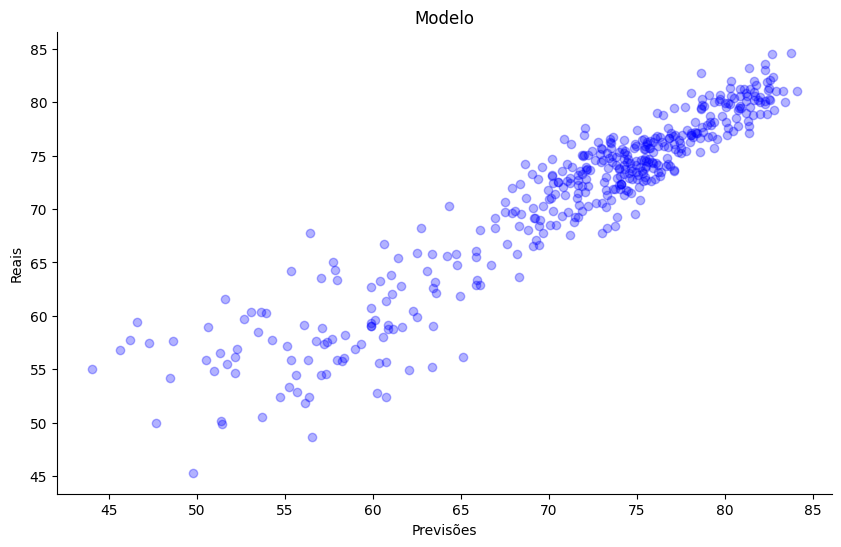

In [59]:
# Plot das previsões
dsa_cria_scatter(df_previsoes.Valor_Real, df_previsoes.Valor_Previsto, 'Modelo', 'Previsões', 'Reais')

In [60]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v1))

Mean Absolute Error: 2.2466139401622134
Mean Squared Error: 9.259835723188807
Root Mean Squared Error: 3.0429978184659956
R2 Score: 0.8795877558374747


In [61]:
# O alpha controla a força da regularização
modelo_dsa_v2 = Lasso(alpha = 1.0)

In [62]:
# Treina o modelo
modelo_dsa_v2.fit(x_treino_scaled, y_treino)

Lasso()

In [63]:
# Previsões com dados de treino
y_pred_treino_v2 = modelo_dsa_v2.predict(x_treino_scaled)

In [64]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v2)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v2))

Mean Absolute Error: 2.6856714716300067
Mean Squared Error: 13.197781811927262
Root Mean Squared Error: 3.632875144004713
R2 Score: 0.8308489455221508


In [65]:
# Previsões com dados de teste com padronização
y_pred_teste_v2 = modelo_dsa_v2.predict(x_teste_scaled)

In [66]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v2))

Mean Absolute Error: 2.686248219107817
Mean Squared Error: 13.541655655374818
Root Mean Squared Error: 3.6798988648296866
R2 Score: 0.8239081992506114


In [67]:
# Cria o modelo com regularização Ridge
# O alpha é o parâmetro de regularização
modelo_dsa_v3 = Ridge(alpha = 1.0)

In [68]:
# Treinamento do modelo
modelo_dsa_v3.fit(x_treino_scaled, y_treino)

Ridge()

In [69]:
# Previsões com dados de treino
y_pred_treino_v3 = modelo_dsa_v3.predict(x_treino_scaled)

In [70]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v3)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v3))

Mean Absolute Error: 2.28765411717305
Mean Squared Error: 9.309477507206052
Root Mean Squared Error: 3.0511436392287488
R2 Score: 0.8806838937465531


In [71]:
# Previsões com dados de teste com padronização
y_pred_teste_v3 = modelo_dsa_v3.predict(x_teste_scaled)

In [72]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v3))

Mean Absolute Error: 2.242840619940794
Mean Squared Error: 9.246683553733002
Root Mean Squared Error: 3.0408359958624867
R2 Score: 0.879758782871552


In [73]:
# Cria o modelo com regularização Elastic Net
# alpha é a força da regularização; l1_ratio é a mistura entre L1 e L2
modelo_dsa_v4 = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [74]:
# Treinamento do modelo
modelo_dsa_v4.fit(x_treino_scaled, y_treino)

ElasticNet()

In [75]:
# Previsões com dados de treino
y_pred_treino_v4 = modelo_dsa_v4.predict(x_treino_scaled)

In [77]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v4)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v4))


Mean Absolute Error: 2.7196720353290584
Mean Squared Error: 13.880953432799407
Root Mean Squared Error: 3.725715157228127
R2 Score: 0.8220929892783956


In [78]:
# Previsões com dados de teste com padronização
y_pred_teste_v4 = modelo_dsa_v4.predict(x_teste_scaled)

In [79]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v4))

Mean Absolute Error: 2.728846529612452
Mean Squared Error: 14.168755761243084
Root Mean Squared Error: 3.76414077330313
R2 Score: 0.8157535695876834


In [80]:
# Definição do modelo
modelo_dsa_v5 = Ridge()

In [81]:
# Definição do espaço de hiperparâmetros para otimização
parametros = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [82]:
# Configuração do GridSearchCV
grid_search_dsa = GridSearchCV(estimator = modelo_dsa_v5,
                               param_grid = parametros,
                               cv = 5,
                               scoring = 'neg_mean_squared_error',
                               verbose = 1)

In [83]:
# Treinamento com otimização de hiperparâmetros
grid_search_dsa.fit(x_treino_scaled, y_treino)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [84]:
# Melhor modelo
melhor_modelo = grid_search_dsa.best_estimator_

In [85]:
# Previsões com dados de treino
y_pred_treino_v5 = melhor_modelo.predict(x_treino_scaled)

In [86]:
# Métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v5)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v5))

Mean Absolute Error: 2.28765411717305
Mean Squared Error: 9.309477507206052
Root Mean Squared Error: 3.0511436392287488
R2 Score: 0.8806838937465531


In [87]:
# Previsões com dados de teste
y_pred_teste_v5 = melhor_modelo.predict(x_teste_scaled)

In [88]:
# Métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v5))

Mean Absolute Error: 2.242840619940794
Mean Squared Error: 9.246683553733002
Root Mean Squared Error: 3.0408359958624867
R2 Score: 0.879758782871552


In [89]:
# Imprime o melhor hiperparâmetro
print('Melhor alpha:', grid_search_dsa.best_params_['alpha'])

Melhor alpha: 1


In [90]:
print('RMSE V1:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('RMSE V2:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('RMSE V3:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('RMSE V4:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('RMSE V5:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))

RMSE V1: 3.0429978184659956
RMSE V2: 3.6798988648296866
RMSE V3: 3.0408359958624867
RMSE V4: 3.76414077330313
RMSE V5: 3.0408359958624867


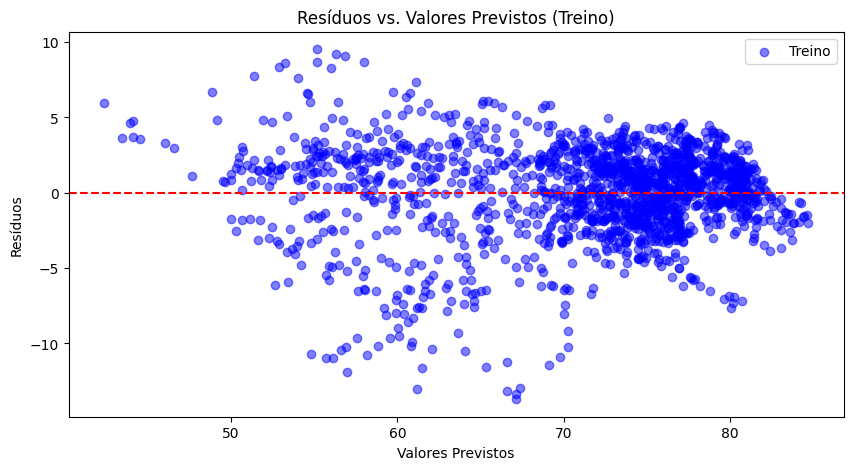

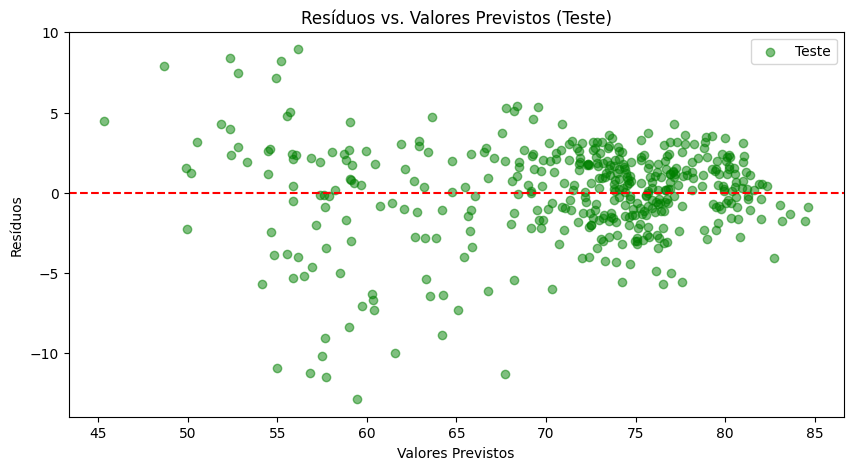

In [93]:
# Calculando os resíduos para o conjunto de treino
residuos_treino = y_treino - y_pred_treino_v1

# Calculando os resíduos para o conjunto de teste
residuos_teste = y_teste - y_pred_teste_v1

# Plotando os resíduos do conjunto de treino
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_treino_v1, residuos_treino, color = 'blue', label = 'Treino', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Treino)')
plt.legend()
plt.show()

# Plotando os resíduos do conjunto de teste
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_teste_v1, residuos_teste, color = 'green', label = 'Teste', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Teste)')
plt.legend()
plt.show()

In [94]:
# Salva o scaler
joblib.dump(dsa_scaler, 'dsa_scaler.pkl')

['dsa_scaler.pkl']

In [95]:
# Salva o modelo
joblib.dump(modelo_dsa_v1, 'modelo_dsa_v1.pkl')

['modelo_dsa_v1.pkl']

In [96]:
# Carrega padronizador e modelo
scaler_final = joblib.load('dsa_scaler.pkl')
modelo_final = joblib.load('modelo_dsa_v1.pkl')